<a href="https://colab.research.google.com/github/ugursirvermez/PyTorch_Education/blob/main/02_pytorch_all_one_place.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BÜTÜN AŞAMALARI BİR ARAYA GETİERECEĞİZ

#1. VERİLER

In [187]:
import torch
from torch import nn
import matplotlib.pyplot as plt

#Torch verisiyonu kontrol edelim
print(torch.__version__)

2.4.0+cu121


GPU OR CPU ?

In [188]:
#Agnostik kod kullanıyoruz.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


# DOĞRUSAL REGRESYON İÇİN VERİ OLUŞTURMA

In [189]:
#Verileri Doğrusal regresyon modeli için oluşturalım.
# y = agirlik * X + eğilim -> y = weight * X + bias
weight = 0.923
bias = 0.44

#Değer aralığını yaratalım.
start = 0
end = 1
step = 0.05

#X ve Y değerlerini olusturalım. (Degiskenleri ve içerikleri olusturuyoruz)
X = torch.arange(start, end, step).unsqueeze(dim=1) #unsqueeze etmezsek hata verir.
y = weight * X +bias
print(X[:10], y[:10])

tensor([[0.0000],
        [0.0500],
        [0.1000],
        [0.1500],
        [0.2000],
        [0.2500],
        [0.3000],
        [0.3500],
        [0.4000],
        [0.4500]]) tensor([[0.4400],
        [0.4861],
        [0.5323],
        [0.5784],
        [0.6246],
        [0.6708],
        [0.7169],
        [0.7630],
        [0.8092],
        [0.8554]])


#Verileri Split Etme
  Ayırma işlemi de deniyor.

In [190]:
#verileri split etme işlemi
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test =y[train_split:]
print(len(X_train), len(y_train), len(X_test), len(y_test))


16 16 4 4


#Plotlib Kullanarak Verilerimizi Görselleştirelim

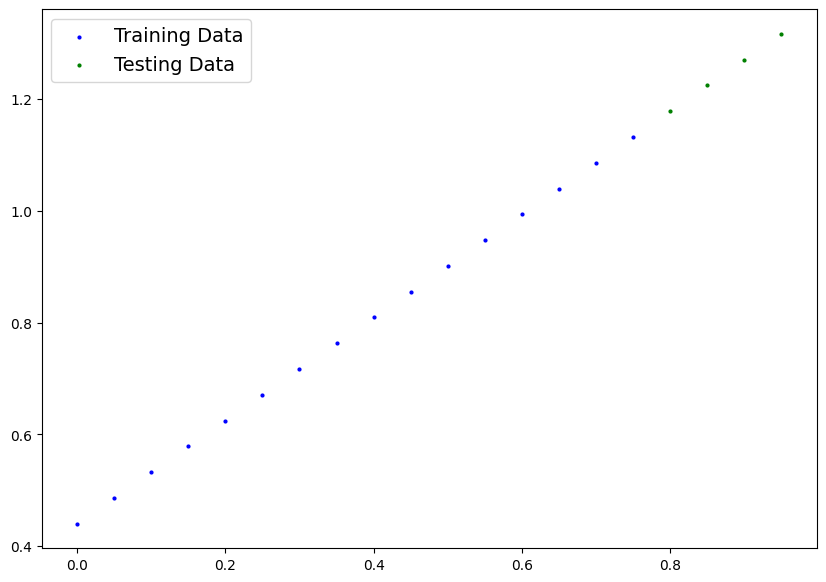

In [191]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions): #Parametreleri fonksiyonu kullanırken dolduracağız.
	plt.figure(figsize=(10,7)) #Grafiğin kaça kaç çizileceğini söylüyorum.
  #Scatter çizmeyi ifade ediyor.
	plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data") #veriyi mavi renkte(c), 4 boyutunda(s) gormek istiyorum.
	plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data") #veriyi yeşil renkte(c), 4 boyutunda(s) gormek istiyorum.
	#eğer tahmin varsa...
	if predictions is not None:
		#tahmini yazdir
		plt.scatter(test_data, predictions, c="r", s=4, label="Predictions"),

	#Show the legend
	plt.legend(prop={"size": 14});

plot_predictions(X_train, y_train, X_test, y_test,None)

# PYTORCH DOĞRUSAL MODELİ OLUŞTURMA

In [192]:
#Doğrusal modeli nn.Module ile sınıfla oluşturalım.
class LinearRegressionModelV2(nn.Module):
	#Initialize etme yani başlatma işleminde olacaklar
	def __init__(self):
		super().__init__()
		#nn.Linear() sayesinde modelin parametrelerini oluşturuyoruz.
		self.linear_layer = nn.Linear(in_features=1, out_features=1) #x ve y içeriğimizi oluşturduk.

	def forward(self, x) -> torch.Tensor: #Devam etme fonksiyonu
		return self.linear_layer(x) #Burada doğrusal denklemi uygulanıyor.

torch.manual_seed(42) #Manual seed yapma
model_1 = LinearRegressionModelV2()
print(model_1)
print(model_1.state_dict())

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


# EĞİTİMİ OLUŞTURMA

In [193]:
#Kayıp fonksiyonu oluşturma
loss_fn = nn.L1Loss() #MAE

#Optimizer oluşturma
optimizer = torch.optim.SGD(params= model_1.parameters(), lr = 0.01)

#Eğitim döngüsü oluşturma
torch.manual_seed(42)

#Kaç devir olacak?
epochs = 200

#Cihaz ayarlama komutları
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

#donguyu oluşturma
for epoch in range(epochs):
	model_1.train() #eğitelim

	#1. forward edelim.
	y_pred = model_1(X_train)

	#2. Kaybı hesapla
	loss = loss_fn(y_pred, y_train)

	#3. Optimizer ile gradyeni sıfırlama
	optimizer.zero_grad()

	#4. Geri yayılım yapma
	loss.backward()

	#5. Optimizer adımı
	optimizer.step()

	#Test etme
	model_1.eval()
	with torch.inference_mode():
		test_pred = model_1(X_test)
		test_loss = loss_fn(test_pred, y_test)

		#Yazdıralım
		if epoch % 10 == 0:
			print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.33058488368988037 | Test loss: 0.23807287216186523
Epoch: 10 | Loss: 0.21652236580848694 | Test loss: 0.10526025295257568
Epoch: 20 | Loss: 0.1024598628282547 | Test loss: 0.02755245566368103
Epoch: 30 | Loss: 0.054607290774583817 | Test loss: 0.0948883593082428
Epoch: 40 | Loss: 0.0484202615916729 | Test loss: 0.10297426581382751
Epoch: 50 | Loss: 0.04460771381855011 | Test loss: 0.1023494303226471
Epoch: 60 | Loss: 0.04103892296552658 | Test loss: 0.09666216373443604
Epoch: 70 | Loss: 0.03756733983755112 | Test loss: 0.08759987354278564
Epoch: 80 | Loss: 0.034145161509513855 | Test loss: 0.08022511005401611
Epoch: 90 | Loss: 0.030667362734675407 | Test loss: 0.07116281986236572
Epoch: 100 | Loss: 0.027251413092017174 | Test loss: 0.06378787755966187
Epoch: 110 | Loss: 0.023767391219735146 | Test loss: 0.054725438356399536
Epoch: 120 | Loss: 0.02035767212510109 | Test loss: 0.0473504364490509
Epoch: 130 | Loss: 0.016870182007551193 | Test loss: 0.03997546434402466
E

# 4. TAHMİNLER YAPMA VE DEĞERLENDİRME

tensor([[1.1814],
        [1.2274],
        [1.2733],
        [1.3193]])


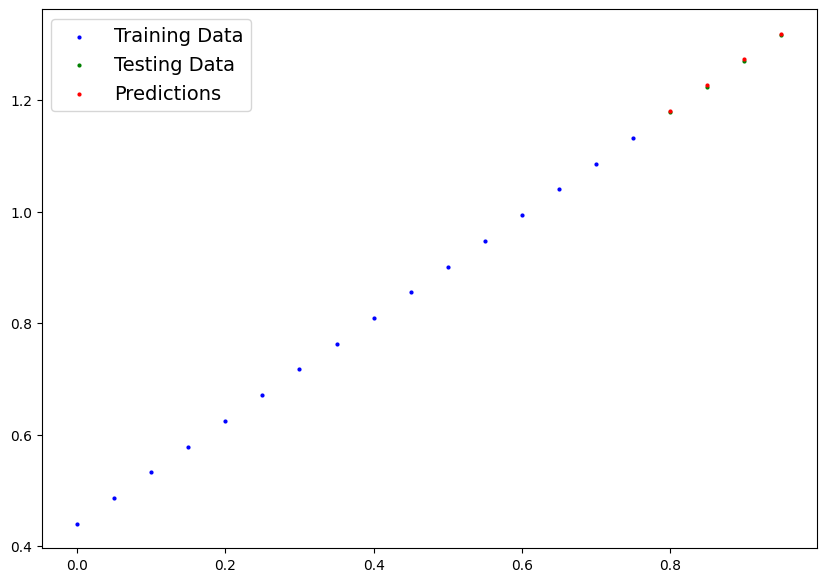

In [194]:
#Değerlendirme moduna alalım.
model_1.eval()

#Tahminler yaparak test verisini test edelim.
with torch.inference_mode():
	y_preds = model_1(X_test)
print(y_preds)
plot_predictions(X_train, y_train, X_test, y_test,predictions=y_preds.cpu()) #önceden bu çizim fonksiyonunu tanımlamıştık.

# 5. MODELİ KAYDETME VE YÜKLEME

**Önce Kaydetme İşlemi**

In [195]:
from pathlib import Path

#1. Modelin klasörün oluşturacağız.
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Modelin yolunu oluşturalım
MODEL_NAME = "01_pytorch_model_V2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Modeli state dict ile kaydetme
print(f"Modeli Kaydet: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)

Modeli Kaydet: models/01_pytorch_model_V2.pth


**Sıra Yükleme İşleminde**

In [196]:
#Yükleme Yapalım yani yeni bir nesne ile başlatalım.

loaded_model_1 = LinearRegressionModelV2()

#Modeli model_1'den alıyoruz.
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Cihazını ayarlayalım.
loaded_model_1.to(device)

#Yazdıralım
print(loaded_model_1.state_dict())

#Son kez kontrol edelim.
loaded_model_1.eval()
with torch.inference_mode():
	loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

OrderedDict([('linear_layer.weight', tensor([[0.9190]])), ('linear_layer.bias', tensor([0.4463]))])


<ipython-input-196-1316299acdf4>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


tensor([[True],
        [True],
        [True],
        [True]])